# ARIMA (AutoRegressive Integrated Moving Average)

Models the relationship between the current value of a time series and its own past values (autoregression) and past errors (moving average).
Handles stationarity by differencing the data if necessary.

In [ ]:
!pip install pandas numpy matplotlib statsmodels


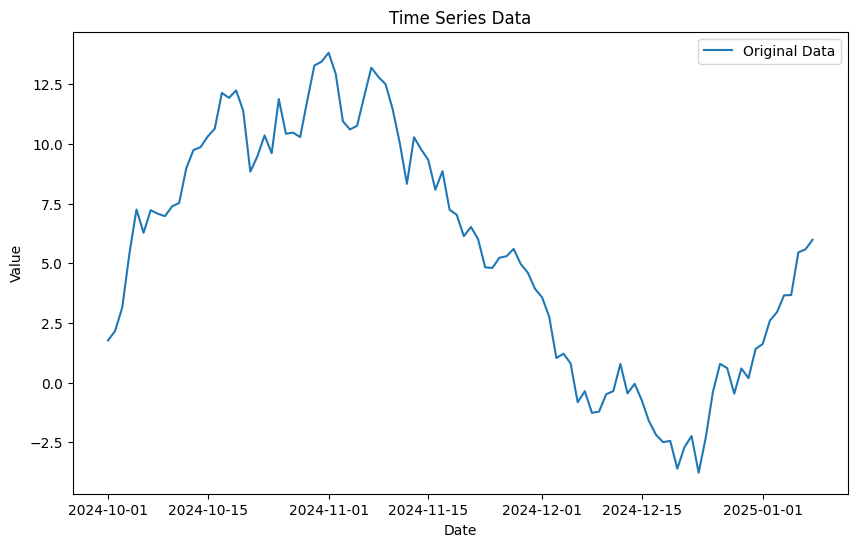

Mean Squared Error: 18.97137327350939


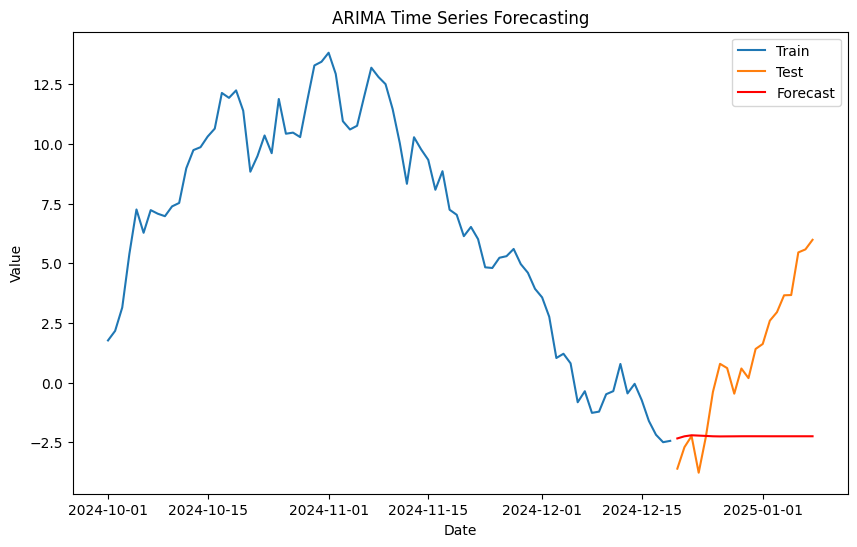

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Create a sample time series dataset
np.random.seed(0)
date_range = pd.date_range(start='2024-10-01', periods=100, freq='D')
data = np.random.randn(100).cumsum()  # Cumulative sum to simulate a trend

# Create DataFrame
df = pd.DataFrame(data, index=date_range, columns=['value'])

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Build the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Make forecast on the test data
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
error = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {error}")

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
